to answer question 4, I don't apply the randomized min-cut algorithm because it does not guarantee the correctness of result, but it give a probably correct result depending on the number of attempts. We need a more deterministic solution, so I decide to applicate an approach that examines all combinations of edges to find the set of edges whose removal disconnects the graph into two connected components.


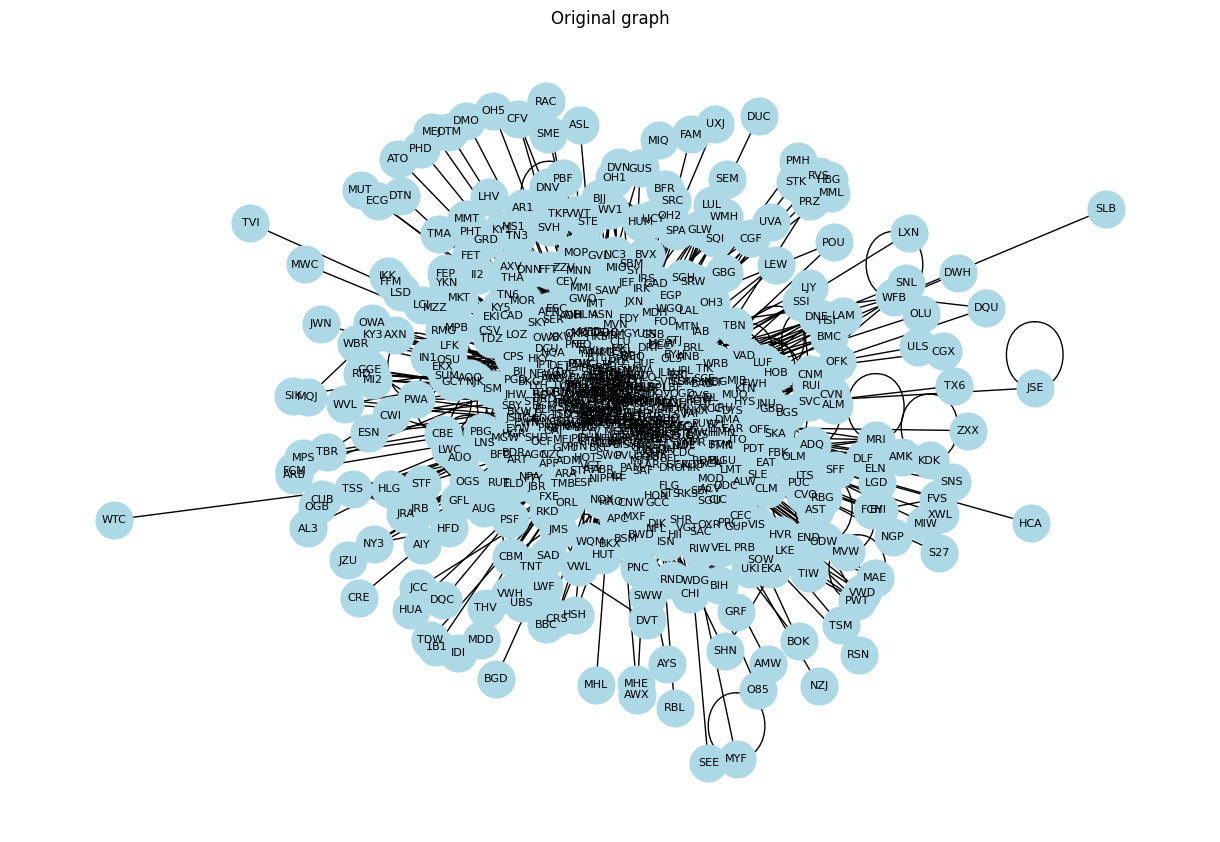

Number of edges removed after cut: 1


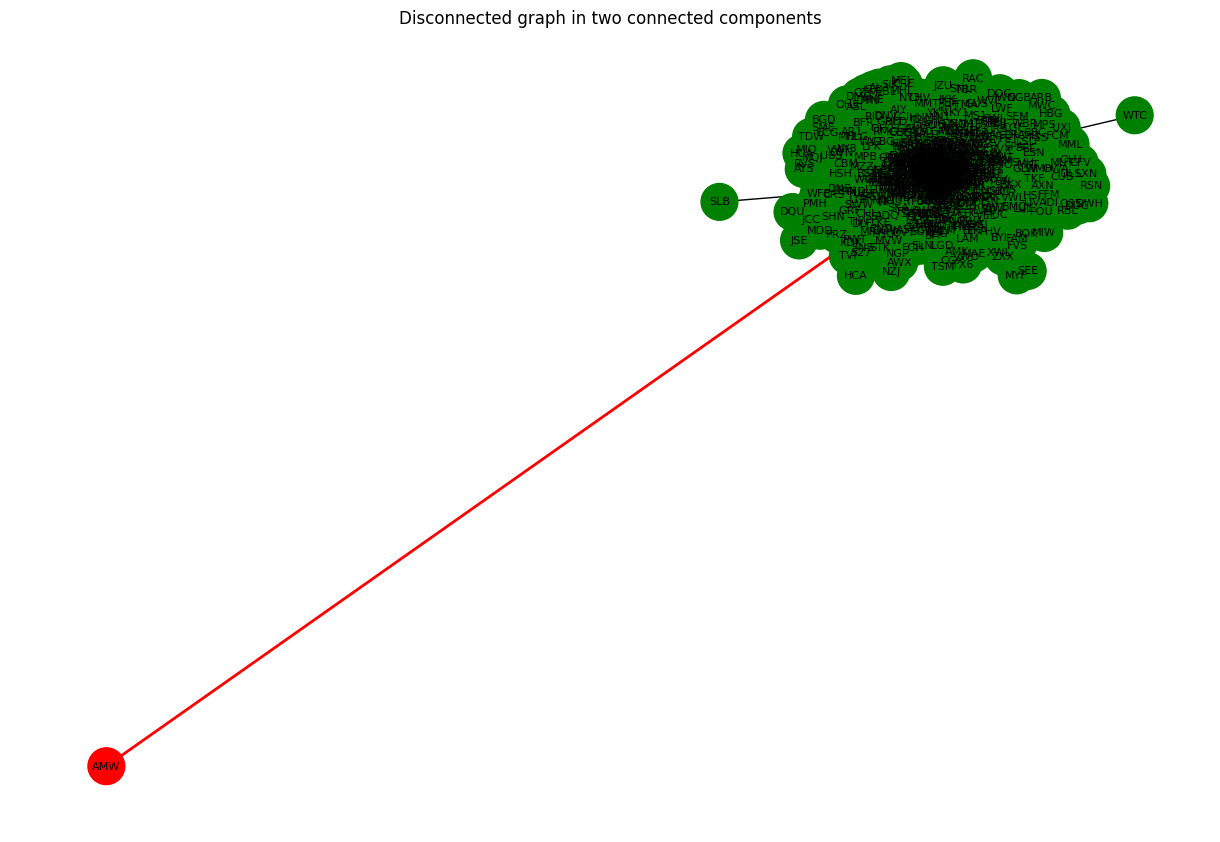

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#import dataset
df = pd.read_csv('/kaggle/input/usa-airport-dataset/Airports2.csv')

#create graph employing data of flights
G = nx.from_pandas_edgelist(df, source='Origin_airport', target='Destination_airport')

#function to visualize graph
def visualize_graph(graph, title, edge_color='black', node_color='lightblue', highlighted_edges=None):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color=node_color, edge_color=edge_color, node_size=700, font_size=8)
    if highlighted_edges:
        nx.draw_networkx_edges(graph, pos, edgelist=highlighted_edges, edge_color='red', width=2)
    plt.title(title)
    plt.show()

#visualize original graph
visualize_graph(G, 'Original graph')

def MinCut(graph):
    import itertools
    #list of all edges
    edges = list(graph.edges())
    #verify all combination of edges to find the minimum number of edges to remove
    for i in range(1, len(edges) + 1):
        for edge_combination in itertools.combinations(edges, i):
            app = graph.copy()  # Usa graph.copy() invece di deepcopy
            app.remove_edges_from(edge_combination)
            if not nx.is_connected(app):
                return list(edge_combination)
    return []


#find minimum cut(set of edges to remove)
mincut_set = MinCut(G)
#remove the minimum set of edges found to divide the graph into two disconnetted components
G.remove_edges_from(mincut_set)
#print the number of flights removed to disconnect the graph
print("Number of edges removed after cut:", len(mincut_set))

#visualize the graph with two connected components highlighted
components = list(nx.connected_components(G))
color=[]
for node in G.nodes():
    if node in components[0]:
        color.append('green')
    else:
        color.append('red')

visualize_graph(G, 'Disconnected graph in two connected components', node_color=color, highlighted_edges=mincut_set)


the results of this approach provides two components:  one consisting of a single node and the other from n-1 nodes... this is likely due to the sparse nature of the graph. To verify if the mincut function provides the correct results we can test the function on some examples of graphs and check whether it identifies the minimum set of edges whose removal disconnects the graph into two connected components.

Number of edges removed after cut: 1


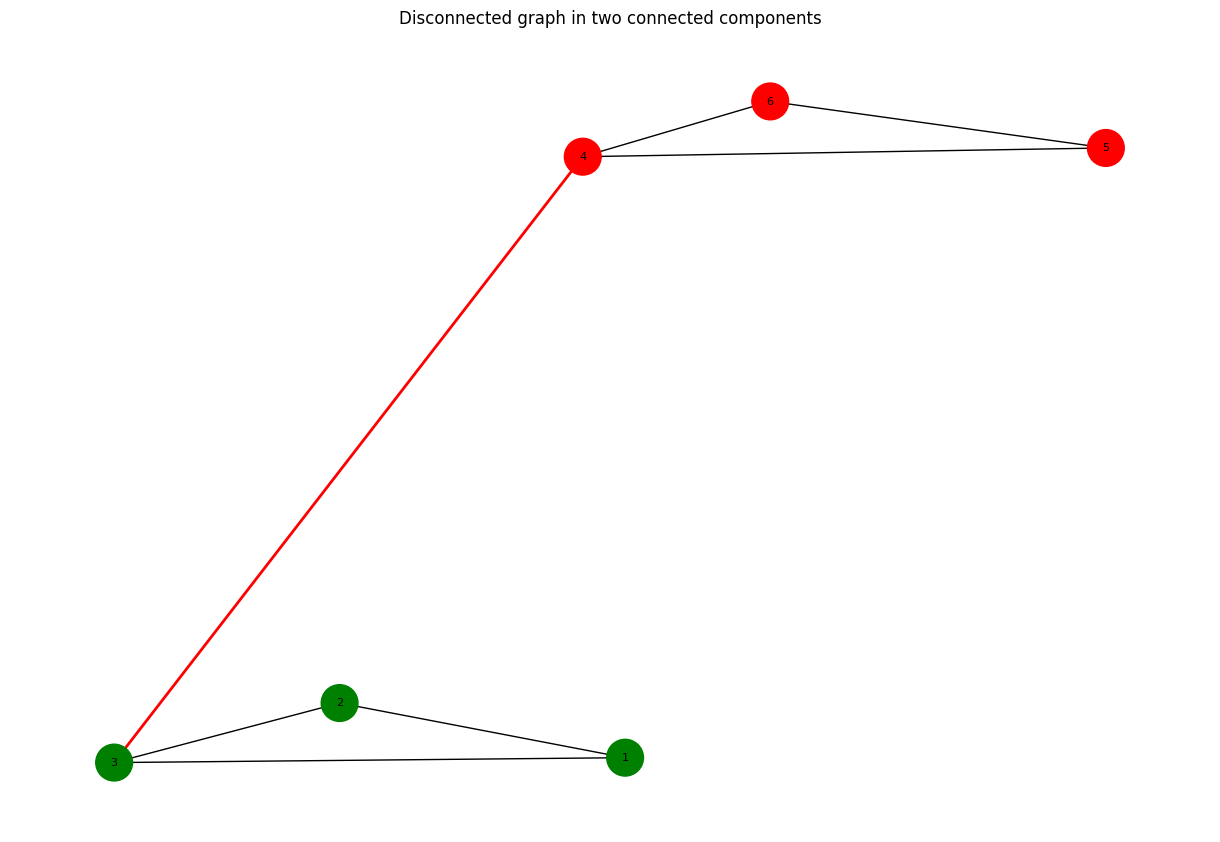

In [ ]:
# create example graph
example = nx.Graph()
example.add_edges_from([(1, 2), (2, 3), (3, 1)])
example.add_edges_from([(4, 5), (5, 6), (6, 4)])
example.add_edge(3, 4)
#find minimum cut(set of edges to remove)
mincut_set = MinCut(example)
#remove the minimum set of edges found to divide the graph into two disconnetted components
example.remove_edges_from(mincut_set)
#print the number of flights removed to disconnect the graph
print("Number of edges removed after cut:", len(mincut_set))

#visualize the graph with two connected components highlighted
components = list(nx.connected_components(example))
color=[]
for node in example.nodes():
    if node in components[0]:
        color.append('green')
    else:
        color.append('red')

visualize_graph(example, 'Disconnected graph in two connected components', node_color=color, highlighted_edges=mincut_set)


Number of edges removed after cut: 1
Edges removed: [(4, 5)]


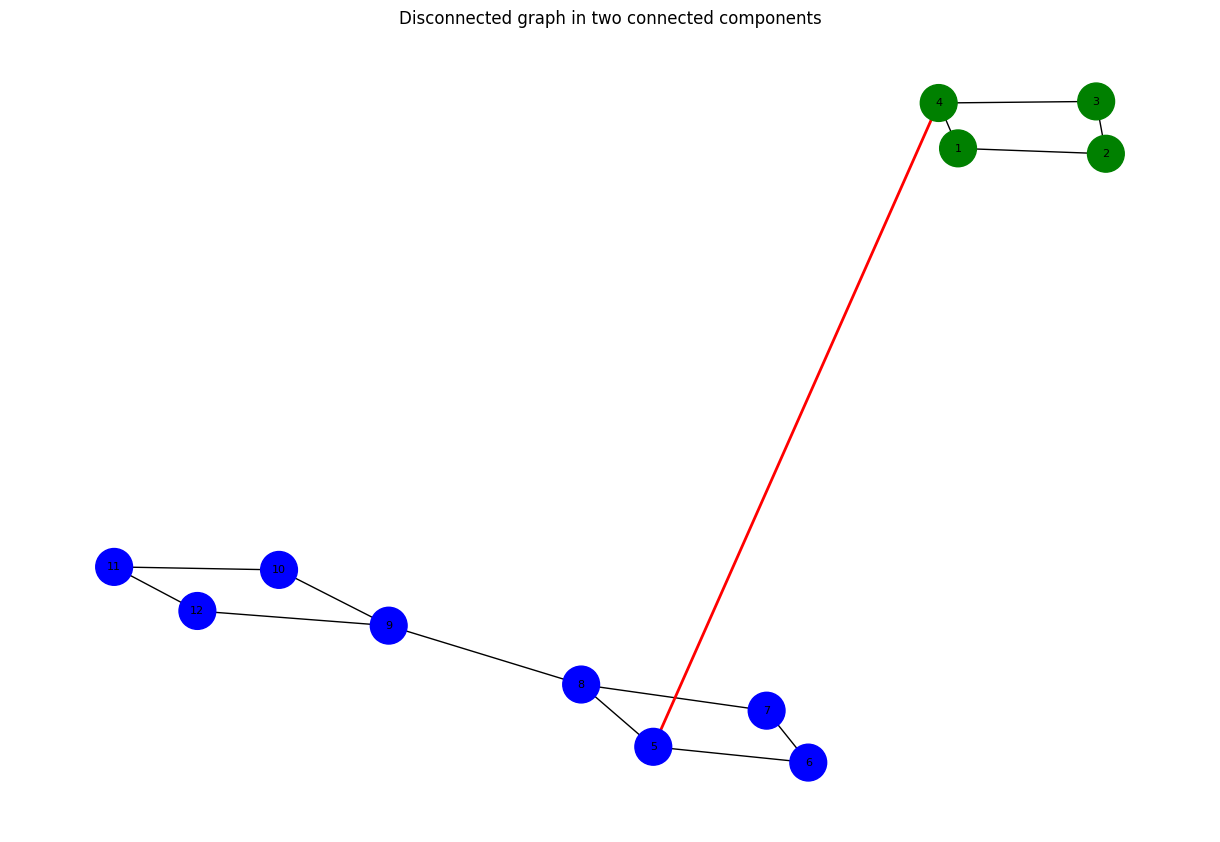

In [ ]:
# create example graph
example = nx.Graph()
example.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
example.add_edges_from([(5, 6), (6, 7), (7, 8), (8, 5)])
example.add_edges_from([(9, 10), (10, 11), (11, 12), (12, 9)])
example.add_edge(4, 5)  # Ponte tra Cluster 1 e Cluster 2
example.add_edge(8, 9)  # Ponte tra Cluster 2 e Cluster 3

#find minimum cut(set of edges to remove)
mincut_set = MinCut(example)
#remove the minimum set of edges found to divide the graph into two disconnetted components
example.remove_edges_from(mincut_set)
#print the number and the flights removed to disconnect the graph
print("Number of edges removed after cut:", len(mincut_set))
print("Edges removed:", mincut_set)

#visualize the graph with two connected components highlighted
components = list(nx.connected_components(example))
color = []
for node in example.nodes():
    if node in components[0]:
        color.append('green')
    else:
        color.append('blue')

visualize_graph(example, 'Disconnected graph in two connected components', node_color=color, highlighted_edges=mincut_set)


Girvan-Newman: 2 communities detected in 14.60 seconds
Girvan-Newman Communities:
Community 1: ['Manchester, NH', 'Oak Harbor, WA', 'Muscatine, IA', 'Union City, TN', 'Klamath Falls, OR', 'Del Rio, TX', 'El Paso, TX', 'Carlsbad, NM', 'Laramie, WY', 'Muncie, IN', 'Corsicana, TX', 'Dallas, TX', 'Ocala, FL', 'Lafayette, LA', 'Portsmouth, OH', 'Tullahoma, TN', 'Hobbs, NM', 'Kansas City, MO', 'College Station, TX', 'Gainesville, FL', 'Toledo, OH', 'Liberal, KS', 'Springfield, OH', 'Marshall, MO', 'Danville, KY', 'Eau Claire, WI', 'Seattle, WA', 'Baton Rouge, LA', 'Grenada, MS', 'Chillicothe, OH', 'Evansville, IN', 'Billings, MT', 'Atlanta, GA', 'Birmingham, AL', 'London, KY', 'Worcester, MA', 'Santa Barbara, CA', 'Jacksonville, FL', 'Greenville, NC', 'Tuscaloosa, AL', 'Bradford, PA', 'Gainesville, GA', 'Paris, TN', 'Kalamazoo, MI', 'Sikeston, MO', 'Topeka, KS', 'Ogdensburg, NY', 'Laurel, MS', 'Kinston, NC', 'Iron Mountain, MI', 'Phoenix, AZ', 'Longview, TX', 'Selma, AL', 'Gadsden, AL', 'For

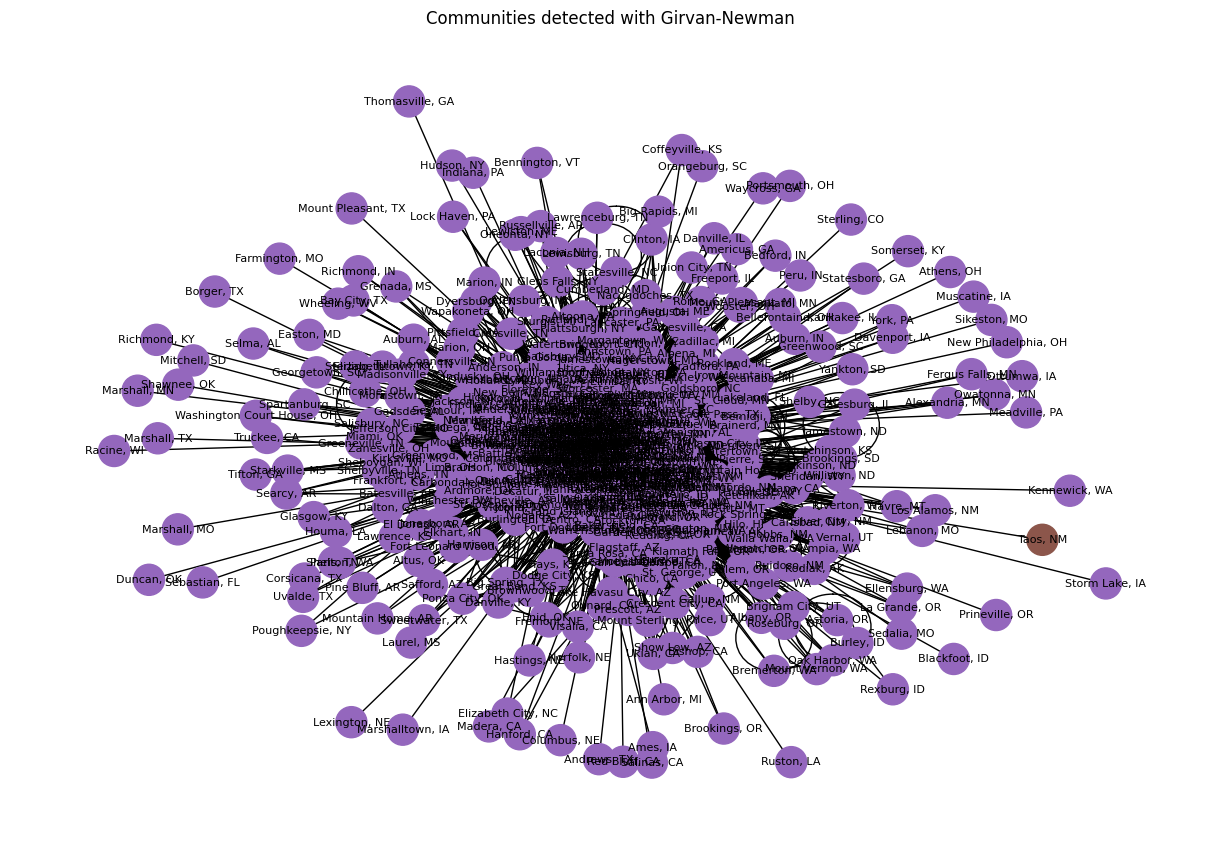

Louvain Communities:
Community 1: ['Manhattan, KS', 'Ames, IA', 'Dallas, TX', 'Wichita, KS', 'Topeka, KS', 'Liberal, KS', 'Rockford, IL', 'Kansas City, MO', 'Springfield, MO', 'Garden City, KS', 'Springfield, IL', 'Decatur, IL', 'St. Louis, MO', 'Detroit, MI', 'Ponca City, OK', 'Enid, OK', 'Harrison, AR', 'Brownwood, TX', 'Dodge City, KS', 'Marion, OH', 'Madisonville, KY', 'Great Bend, KS', 'Hays, KS', 'Burlington, IA', 'Joplin, MO', 'Fort Leonard Wood, MO', 'Peru, IN', 'Columbia, MO', 'Rome, GA', 'El Dorado, AR', 'Crossville, TN', 'Ardmore, OK', 'Paris, TN', 'Springfield, OH', 'Auburn, IN', 'Corsicana, TX', 'Jonesboro, AR', 'Sterling, IL', 'Gadsden, AL', 'Dalton, GA', 'Mount Vernon, IL', 'Easton, MD', 'Grenada, MS', 'Sturgis, MI', 'Searcy, AR', 'Laurel, MS', 'Marion, IN', 'Ruston, LA', 'Shelby, NC', 'Bedford, IN', 'Gainesville, GA', 'Mount Pleasant, MI', 'Sikeston, MO', 'Wapakoneta, OH', 'Sedalia, MO', 'Danville, IL', 'Safford, AZ', 'Union City, TN', 'Elizabethtown, KY', 'Pine Bluff, 

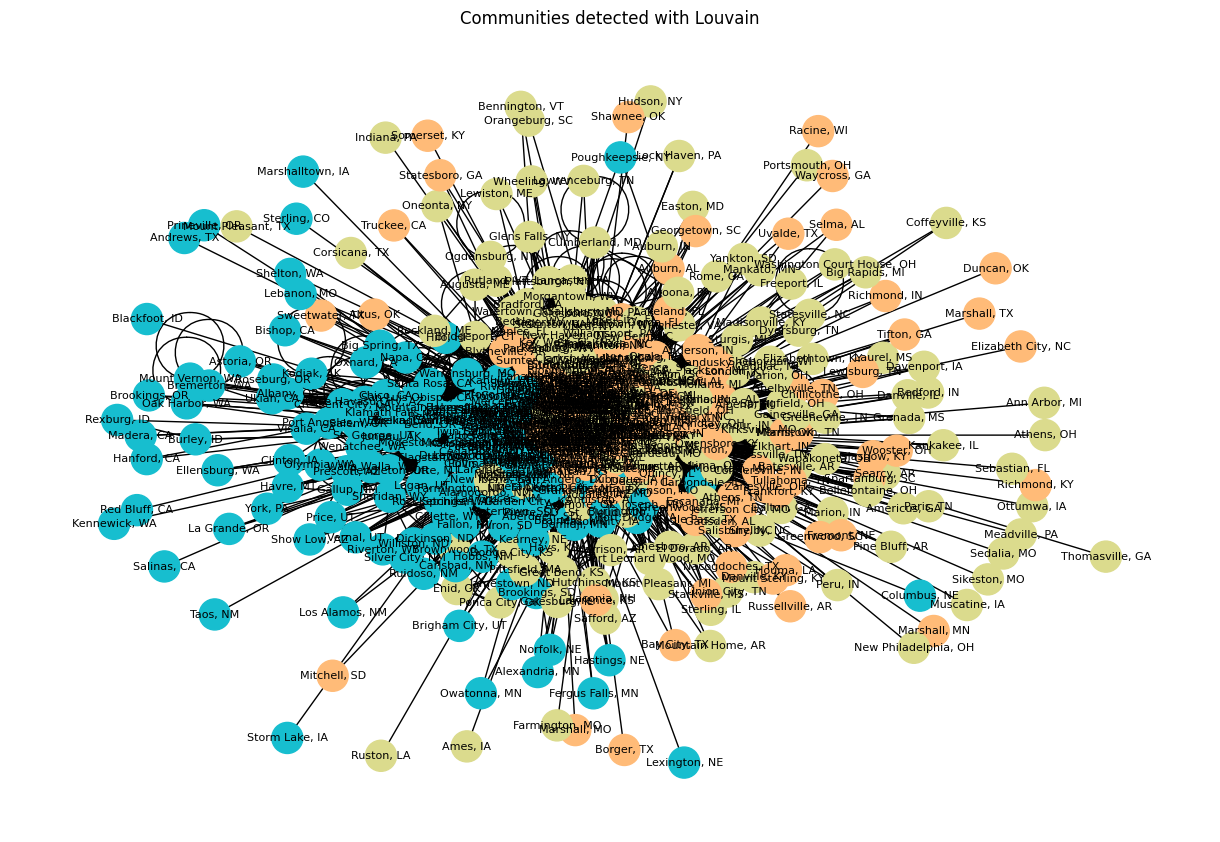

Write here the first city:  Manhattan
Write here the second city:  Manchester


Girvan-Newman: Manhattan and Manchester are not in the same community.
Louvain: Manhattan and Manchester are not in the same community.


In [ ]:
import community as community_louvain
import time
import random
from collections import defaultdict

#create graph employing cities as nodes
G = nx.from_pandas_edgelist(df, source='Origin_city', target='Destination_city')


def visualize_communities(graph, communities, title):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph)
    #assign a color for each communities
    community_colors = {}
    for i in range(len(communities)):
        community_colors[i] = random.choice(plt.cm.tab20.colors)
    #assign colors to nodes based communities
    node_colors = []
    for node in graph:
        for i in range(len(communities)):
            if node in communities[i]:
                node_colors.append(community_colors[i])
                break

    #draw graph
    nx.draw(graph, pos, node_color=node_colors, with_labels=True, node_size=500, font_size=8)
    plt.title(title)
    plt.show()

def girvan_newman(graph):
    graph_copy = graph.copy()
    while nx.is_connected(graph_copy):
    #calculate betweenness centrality and remove the edge with the highest betweenness centrality value
        edge = max(nx.edge_betweenness_centrality(graph_copy), key=nx.edge_betweenness_centrality(graph_copy).get)
        u, v = edge
        graph_copy.remove_edge(u,v)
    return list(nx.connected_components(graph_copy))

# apply Girvan-Newman
start_time = time.time()
girvan_communities = girvan_newman(G)
girvan_time = time.time() - start_time

print(f"Girvan-Newman: {len(girvan_communities)} communities detected in {girvan_time:.2f} seconds")
print("Girvan-Newman Communities:")
for i in range(len(girvan_communities)):
    print(f"Community {i + 1}: {list(girvan_communities[i])}")
visualize_communities(G, girvan_communities, "Communities detected with Girvan-Newman")

# Methods Louvain suggested from LLM
start_time = time.time()
partition = community_louvain.best_partition(G)  # find communities with Louvain
louvain_communities = defaultdict(list)
for node, id_communities in partition.items():
    louvain_communities[id_communities].append(node)
louvain_time = time.time() - start_time

louvain_communities_list = list(louvain_communities.values())
print("Louvain Communities:")
for i in range(len(louvain_communities_list)):
    print(f"Community {i + 1}: {louvain_communities_list[i]}")
print(f"Louvain: {len(louvain_communities_list)} communities detected in {louvain_time:.2f} seconds")

visualize_communities(G, louvain_communities_list, "Communities detected with Louvain")


def are_in_same_community(city1, city2, communities):
    for i in communities:
        if city1 in i and city2 in i:
            return True
    return False


#choose two cities '
city1 = input("Write here the first city: ")
city2 = input("Write here the second city: ")

#verify if two cities are in the same communities for girvan newman
verify_girvan = are_in_same_community(city1, city2, girvan_communities)
#verify if two cities are in the same communities for louvain
verify_louvain = any(city1 in i and city2 in i for i in louvain_communities_list)

print(f"Girvan-Newman: {city1} and {city2} {'are' if verify_girvan else 'are not'} in the same community.")
print(f"Louvain: {city1} and {city2} {'are' if verify_louvain else 'are not'} in the same community.")


We employed the girvan newmann algorithm to detect communities as suggested by the provided link. This algorithm recursively removes edges with the highest betweenness centrality to identify communities. Additionally we utilized the Louvain algorithm as recommended by the LLM.
The first difference we observed in the results of these two algorithms is that the Girvan Newman algorithm detected only two communities, in contrast the Louvain algorithm detected four communities. The results of whether the cities are in the same communities are the same for both algorithms.
Another difference we noted is in their performance. The Louvain algorithm is significantly faster than the Girvan-Newman algorithm, making Girvan-Newman more suitable for small or medium-sized graphs.
